# **PREPROCESSING DATA**

pada tahapan ini kita akan melakukan analisa pada data dan mengolah data

## **MENYIAPKAN DATA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data iris.csv", delimiter=";")

df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


---
<center style="color:red"><b>PENJELASAN</b></center>

---


-> `import pandas as pd`

-> `import seaborn as sns`

kode tersebut adalah import, dimana tujuannya agar **dapat menggunakan library** tersebut

-> `df = pd.read_csv(
  \__path\__)`

kode tersebut merupakan **pengambilan data** dalam bentuk csv agar bisa digunakan dan di simpan dalam kode python dalam variable **df**. Untuk \__path\__ sendiri bisa disesuaikan dengan directory data nya

-> `df.head()`

kode tersebut digunakan untuk **menampilkan 5 data teratas** (secara defaulth). Kamu bisa merubahnya untuk menampilkan berapapun banyak data teratas. Misal kamu ingin menampilkan 7 data teratas, maka kamu harus merubahnya menjadi `df.head(7)`


---



## **FORMAT DATA**

In [2]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.Gender.unique` kita mencoba melihat apakah ada **data yang formatnya berbeda atau tidak**.

---

## **DATA OUTLIERS**

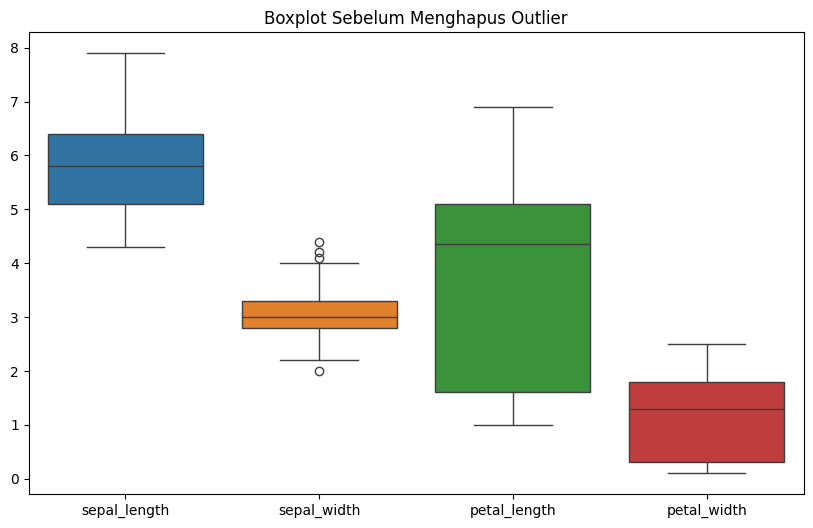

In [3]:
# Boxplot sebelum menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh fitur. Dari hasil yang di atas, kita dapat melihat **terdapat outliers** untuk bagian **sepal_width** di bawah persegi (**lingkaran pada titik y di angka mendekati 2**) dan di atas titik y 4.

---

In [4]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")

# Hapus outlier
df = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")


Jumlah data sebelum menghapus outlier: 150
Jumlah data setelah menghapus outlier: 146


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas, kita menggunakan metode **IQR** untuk menghilangkan outliernya. Metode ini bekerja dengan cara menghapus data yang berada di luar rentang normal, yaitu data yang berada di bawah batas bawah (lower bound) dan di atas batas atas (upper bound).

---

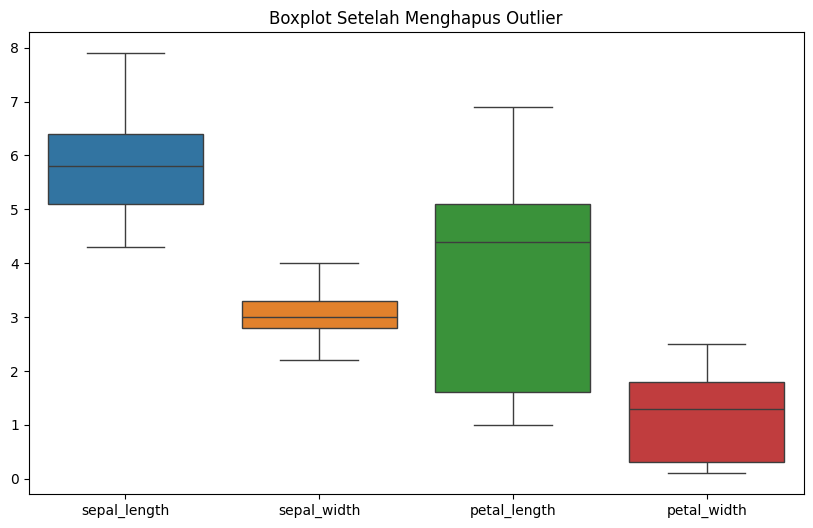

In [5]:
# Boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()


---
<center style="color:red"><b>PENJELASAN</b></center>

---

Dalam kode `sns.boxplot(data=df.iloc[:, :-1])`, kita memvisualisasikan data setelah menghapus outlier. Dari boxplot, kita dapat melihat bahwa **tidak ada lagi outlier**, yang ditandai dengan lingkaran di luar whiskers. Hal ini menunjukkan bahwa data telah bersih dan distribusinya kini lebih sesuai dengan rentang normal.

---

## **DATA DUPLIKASI**

In [6]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df[df.duplicated()]` kita mencoba melihat apakah **ada data yang terduplikasi atau tidak**. Dari hasil tersebut, kita dapat melihat kalau **ada data yang terduplikasi**. Maka kita akan masuk pada tahapan selanjutnya untuk menghilangkan data duplikasi tersebut.

---

In [7]:
df.drop_duplicates(inplace=True)
df.shape

C:\Users\dirga\AppData\Local\Temp\ipykernel_1764\3054484884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


(143, 5)

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.drop_duplicates(inplace=True)` telah menghilangkan data yang terduplikasi tersebut. kemudian pada kode `df.shape` kita dapat melihat hasil **kolom dan baris** nya menjadi `(143, 5)`.

---

<center><h2><b>DATA KOSONG</b></h2></center>

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.isna().sum()` kita akan melihat dari data tersebut apakah `ada data kosong atau tidak`. Dari hasil diatas tidak terdapat data yang kosong. Maka kita bisa lanjut ke tahapan selanjutnya. `df.isna()` artinya kita akan melihat untuk apakah suatu data itu kosong atau tidak. `.sum()` digunakan untuk menghitung berapa banyak data untuk setiap kolom yang hilang.

---

# **MODELING**

pada tahapan ini kita akan melakukan training model dan evaluasi

## **IMPORT LIBRARY**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


---
<center style="color:red"><b>PENJELASAN</b></center>

---
fungsi dari library
- train_test_split -> untuk memisahkan *data train* dan *data test*
- classification_report -> untuk melihat dari hasil evaluasi model
- KNeighborsClassifier -> untuk mengakses model *knn* yang sudah pernah dibuat
- DecisionTreeClassifier -> untuk mengakses model *decision tree* yang sudah pernah dibuat
- RandomForestClassifier -> untuk mengakses model *random forest* yang sudah pernah dibuat
- LogisticRegression -> untuk mengakses model *logistic regression* yang sudah pernah dibuat
- SVC -> untuk mengakses model *svm* yang sudah pernah dibuat

---

## **DATA SPLIT**

In [10]:
X = df.drop(columns="class")
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,sepal_length,sepal_width,petal_length,petal_width
90,5.5,2.6,4.4,1.2
29,4.7,3.2,1.6,0.2
45,4.8,3.0,1.4,0.3
92,5.8,2.6,4.0,1.2
25,5.0,3.0,1.6,0.2
...,...,...,...,...
77,6.7,3.0,5.0,1.7
112,6.8,3.0,5.5,2.1
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


In [11]:
X_train.shape, X_test.shape


((100, 4), (43, 4))

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `X = df.drop(columns="class")` dimana kita telah menentukan *data x (data input)* dengan mengambil seluruh data kecuali *labelnya (data output)*. Lalu untuk kode `y = df.class` kita mengambil data labelnya saja / *data output*. Untuk kode ini `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)` kita memisahkan antara *data train* dan *data test*. Data yang sudah di split / dipisahkan inilah akan digunakan untuk training dan evaluation.

---

## **MODEL TRAINING AND EVALUATION**

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.95        43
      macro avg       0.95      0.95      0.95        43
   weighted avg       0.95      0.95      0.95        43



In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.93      0.81      0.87        16

       accuracy                           0.91        43
      macro avg       0.91      0.91      0.91        43
   weighted avg       0.91      0.91      0.91        43



In [14]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.93      0.81      0.87        16

       accuracy                           0.91        43
      macro avg       0.91      0.91      0.91        43
   weighted avg       0.91      0.91      0.91        43



In [15]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.93      0.81      0.87        16

       accuracy                           0.91        43
      macro avg       0.91      0.91      0.91        43
   weighted avg       0.91      0.91      0.91        43



In [16]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.75      0.86        16

       accuracy                           0.91        43
      macro avg       0.92      0.92      0.91        43
   weighted avg       0.93      0.91      0.91        43

